# Experiment 2.3

HPO of Transformer on ftS load pred_len=24 </br>
Find good lr and bs for each model size

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.3'

## Import data and plot all benchmark results

In [2]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.3_metrics.csv", index_col=0)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
0,0.00001,32,2,1,32,0.154626,0.313433,16,11,0.0,204
1,0.00001,32,2,1,128,0.060698,0.186632,14,7,0.7,311
2,0.00001,32,2,1,512,0.035730,0.138979,13,7,10.5,693
3,0.00001,32,4,3,128,0.052609,0.172954,9,8,1.6,531
4,0.00001,64,2,1,32,0.200784,0.360506,16,5,0.0,261
5,0.00001,64,2,1,128,0.083573,0.222786,18,5,0.7,362
6,0.00001,64,2,1,512,0.041707,0.151181,12,5,10.5,1092
7,0.00001,64,4,3,128,0.072812,0.209670,14,7,1.6,782
8,0.00001,128,2,1,32,0.320043,0.461699,16,3,0.0,377
9,0.00001,128,2,1,128,0.131649,0.288146,18,3,0.7,790


In [3]:
hpo_table.sum(axis=0)

learning_rate        0.019320
batch_size        3584.000000
e_layers           120.000000
d_layers            72.000000
d_model           9600.000000
MSE                  2.602401
MAE                  7.876551
Epochs             540.000000
Time[min]          209.000000
Params[Mio.]       153.600000
Max_mem[MB]      36066.000000
dtype: float64

In [4]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df

,learning_rate,batch_size,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
43,0.00100,64,4,3,128,0.026639,0.115215,16,8,1.6,782
39,0.00100,32,4,3,128,0.027399,0.118691,8,7,1.6,531
26,0.00050,32,2,1,512,0.027422,0.120541,6,3,10.5,693
27,0.00050,32,4,3,128,0.027796,0.119755,12,10,1.6,531
41,0.00100,64,2,1,128,0.028039,0.119851,9,2,0.7,362
30,0.00050,64,2,1,512,0.028077,0.120609,12,5,10.5,1092
25,0.00050,32,2,1,128,0.028156,0.119444,11,5,0.7,311
18,0.00010,64,2,1,512,0.028420,0.121863,13,6,10.5,1092
47,0.00100,128,4,3,128,0.028447,0.120113,11,3,1.6,1617
29,0.00050,64,2,1,128,0.028534,0.121159,7,2,0.7,362


## Learning rate vs MSE

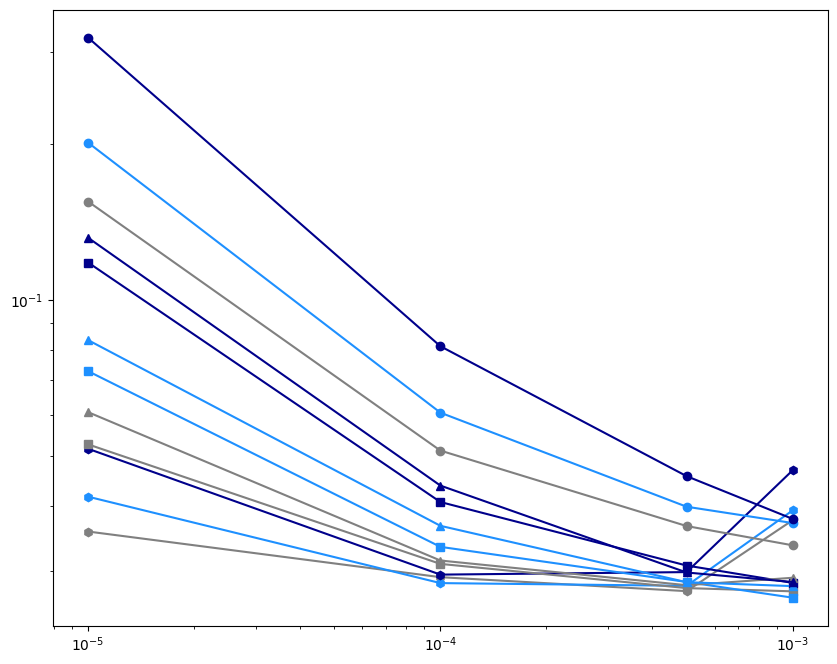

In [5]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.0: 'o', 0.7: '^', 1.6: 's', 10.5: 'h'}
batch_sizes = [32, 64, 128]
model_sizes = [10.5, 1.6, 0.7, 0.0]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for ms in model_sizes:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["Params[Mio.]"] == ms)]
        ax.plot(hpo_table_subset["learning_rate"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[ms])

ax.set_xscale("log")
ax.set_yscale("log")



## Params[Mio.] vs MSE

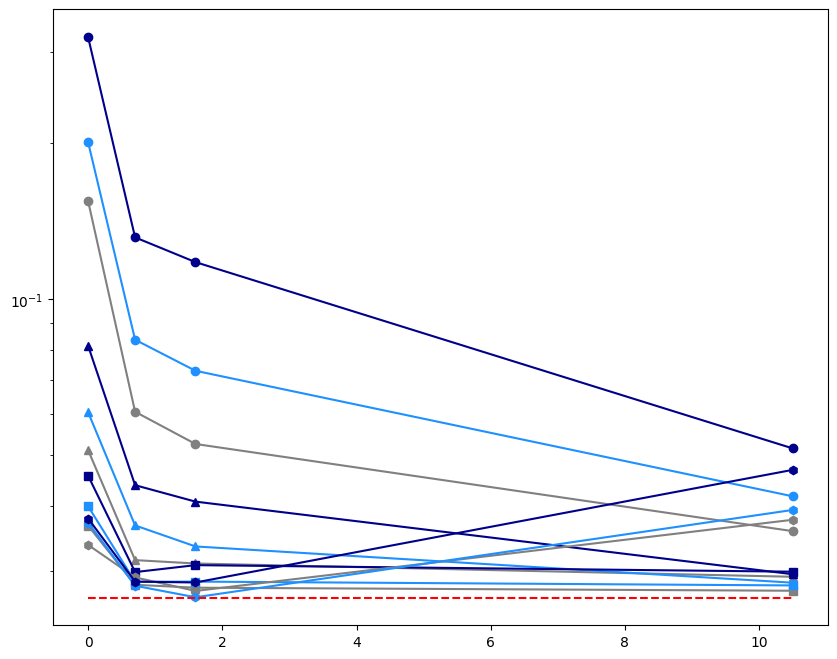

In [6]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.00001: 'o', 0.0001: '^', 0.0005: 's', 0.001: 'h'}
batch_sizes = [32, 64, 128]
#model_sizes = [10.5, 1.6, 0.7, 0.0]
learning_rates = [0.00001, 0.0001, 0.0005, 0.001]

hpo_table.sort_values(by="Params[Mio.]", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for lr in learning_rates:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["learning_rate"] == lr)]
        #print(hpo_table_subset)
        ax.plot(hpo_table_subset["Params[Mio.]"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[lr])

ax.set_yscale("log")
ax.hlines(0.0266, 0,10.5, color="red", linestyles="--")
#ax.set_ylim(0.02, 0.08)



(0.02, 0.05)

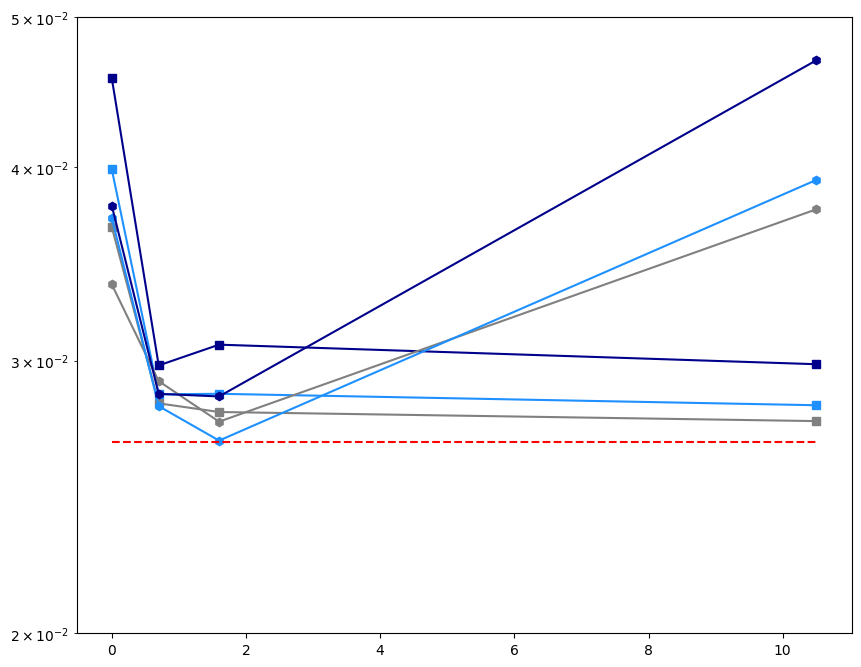

In [7]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.00001: 'o', 0.0001: '^', 0.0005: 's', 0.001: 'h'}
batch_sizes = [32, 64, 128]
#model_sizes = [10.5, 1.6, 0.7, 0.0]
learning_rates = [0.0005, 0.001]

hpo_table.sort_values(by="Params[Mio.]", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for lr in learning_rates:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["learning_rate"] == lr)]
        #print(hpo_table_subset)
        ax.plot(hpo_table_subset["Params[Mio.]"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[lr])

ax.set_yscale("log")
ax.hlines(0.0266, 0,10.5, color="red", linestyles="--")
ax.set_ylim(0.02, 0.05)



In [8]:
#--> 0.0 Mio: bs=32, lr=0.001
#--> 0.7Mio: bs=64, lr=0.001 (inferred by plot below)
#--> (deep) 1.7Mio: bs=32 or bs=64, lr=0.001 (64 is better but less robust)
#--> 10.5Mio bs=32, lr=0.0005 (inferred by this and plot above)

# Check even larger learning rate for smallest model
# Check 5Mio model parametrization
# Check even larger models


(0.023, 0.032)

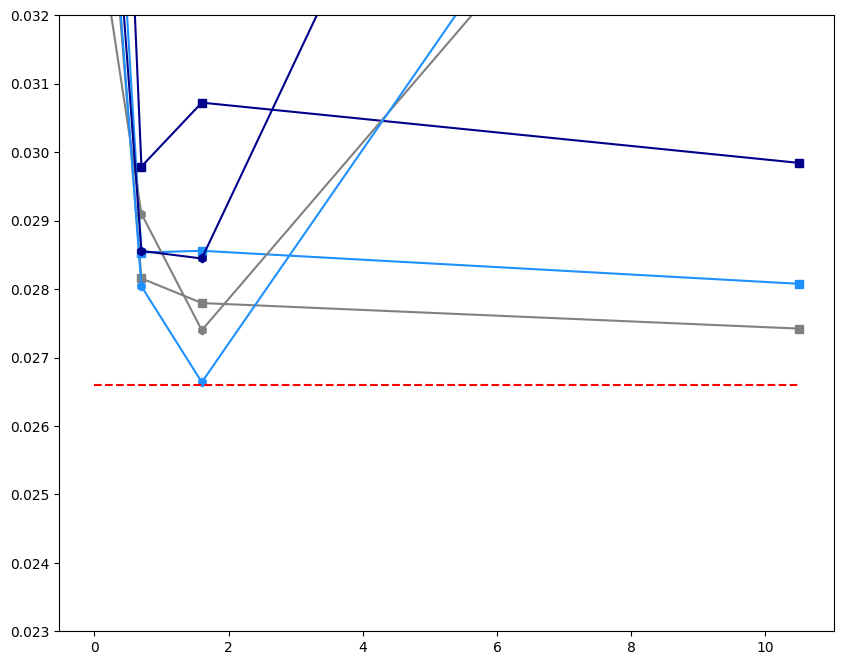

In [9]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.00001: 'o', 0.0001: '^', 0.0005: 's', 0.001: 'h'}
batch_sizes = [32, 64, 128]
#model_sizes = [10.5, 1.6, 0.7, 0.0]
learning_rates = [0.0005, 0.001]

hpo_table.sort_values(by="Params[Mio.]", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for lr in learning_rates:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["learning_rate"] == lr)]
        #print(hpo_table_subset)
        ax.plot(hpo_table_subset["Params[Mio.]"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[lr])

#ax.set_yscale("log")
ax.hlines(0.0266, 0,10.5, color="red", linestyles="--")
ax.set_ylim(0.023, 0.032)



In [10]:
hpo_table.sort_values(by="Params[Mio.]", inplace=True)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
0,0.00001,32,2,1,32,0.154626,0.313433,16,11,0.0,204
12,0.00010,32,2,1,32,0.051180,0.172800,9,4,0.0,204
8,0.00001,128,2,1,32,0.320043,0.461699,16,3,0.0,377
4,0.00001,64,2,1,32,0.200784,0.360506,16,5,0.0,261
40,0.00100,64,2,1,32,0.037105,0.143349,6,1,0.0,261
20,0.00010,128,2,1,32,0.081336,0.220297,18,3,0.0,377
44,0.00100,128,2,1,32,0.037789,0.144240,9,1,0.0,377
16,0.00010,64,2,1,32,0.060564,0.189215,16,5,0.0,261
32,0.00050,128,2,1,32,0.045687,0.161962,9,1,0.0,377
24,0.00050,32,2,1,32,0.036612,0.141836,7,3,0.0,204


In [11]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE"]]

In [12]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(10, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    if ynames is None:
        ynames = column_names
    else:
        ynames = ynames

    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    print(ys.shape)

    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter
    jitter_strength = 0.00001  # Adjust this value based on your data range
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, -1] = 0  # Don't jitter the last column

    zs += jitter


    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
            #ax.set_yscale('log')


    axes[-1].set_yscale('log')

    #axes[-2].set_yscale('log')
    #axes[-3].set_yscale('log')

    host.set_xlim(0, ys.shape[1] - 1)
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=14)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    host.set_title('Parallel Coordinates Plot', fontsize=18)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)

    plt.tight_layout()
    plt.show()


(48, 4)


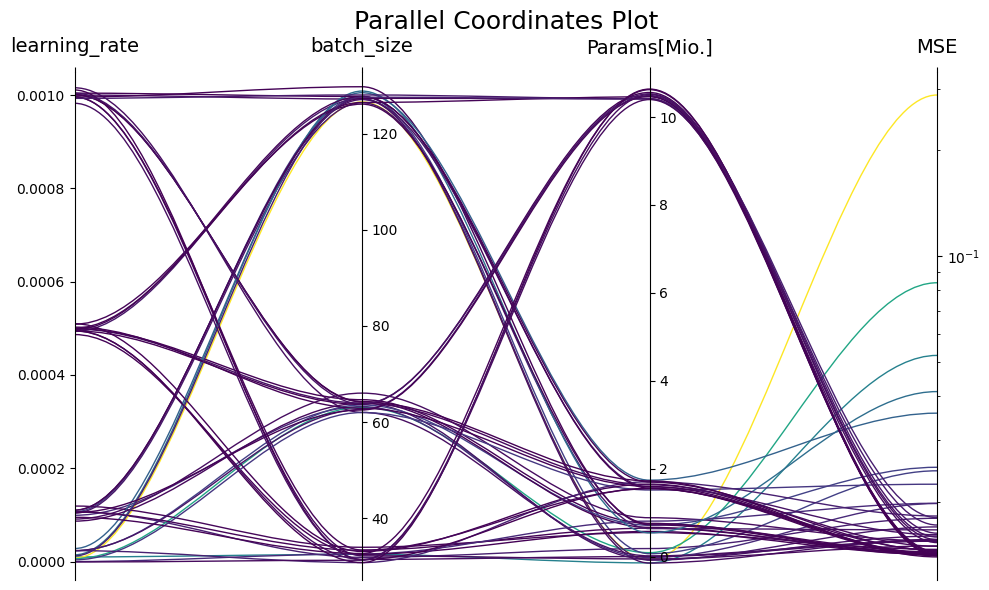

(22, 4)


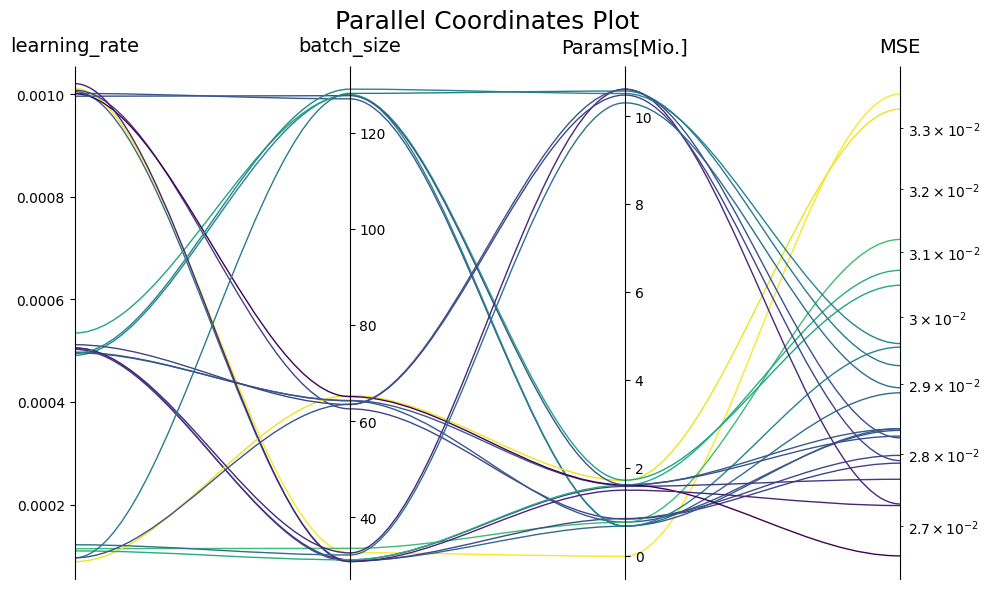

In [13]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "batch_size", "Params[Mio.]", "MSE"])
parallel_coordinates(reduced_hpo_table, ["learning_rate", "batch_size", "Params[Mio.]", "MSE"], threshold=0.035)

    learning_rate  batch_size  Params[Mio.]       MSE
0         0.00001          32           0.0  0.154626
12        0.00010          32           0.0  0.051180
8         0.00001         128           0.0  0.320043
4         0.00001          64           0.0  0.200784
40        0.00100          64           0.0  0.037105
20        0.00010         128           0.0  0.081336
44        0.00100         128           0.0  0.037789
16        0.00010          64           0.0  0.060564
32        0.00050         128           0.0  0.045687
24        0.00050          32           0.0  0.036612
36        0.00100          32           0.0  0.033610
28        0.00050          64           0.0  0.039890
37        0.00100          32           0.7  0.029100
5         0.00001          64           0.7  0.083573
41        0.00100          64           0.7  0.028039
29        0.00050          64           0.7  0.028534
13        0.00010          32           0.7  0.031415
17        0.00010          6

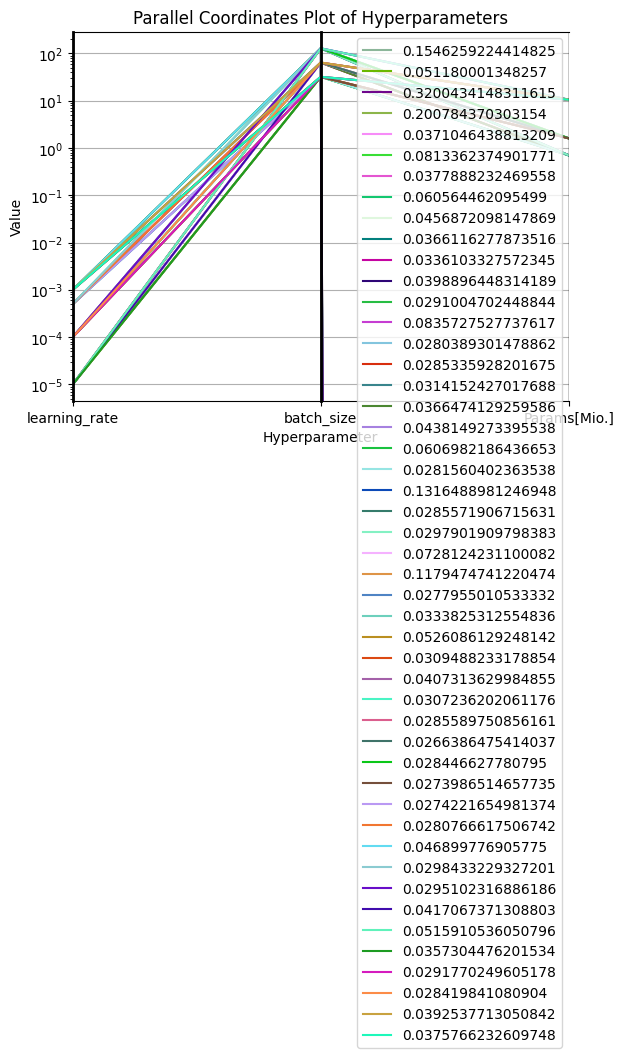

In [14]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE"]]
#reduced_hpo_table["MSE"] = reduced_hpo_table["MSE"].log()
print(reduced_hpo_table)
parallel_coordinates(reduced_hpo_table, class_column="MSE")


# Optionally, adjust axes to better deal with different scales
ax = plt.gca()  # Get current axes
ax.set_yscale('log')  # Set the y-scale to logarithmic for better visibility

# Adjust specific axes
ax.spines['left'].set_position(('axes', 0))  # MSE
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_position(('axes', 0.5))  # Learning Rate
ax.spines['right'].set_linewidth(2)
ax.spines['right'].set_visible(True)

plt.title("Parallel Coordinates Plot of Hyperparameters")
plt.xlabel("Hyperparameter")
plt.ylabel("Value")
plt.grid(True)
plt.show()


In [15]:
import plotly.express as px
fig = px.parallel_coordinates(reduced_hpo_table, color="MSE", labels={
                "learning_rate": "Learning rate", "batch_size": "Batch size",
                 "Params[Mio.]": "Params[Mio.]", "MSE": "MSE",},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             
                             range_color=[0.025, 0.05])
fig.show()

(23,)
(23,)
(23, 5)


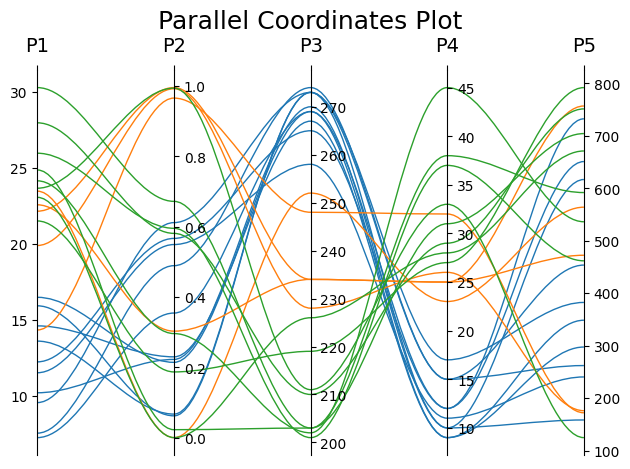

In [16]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

fig, host = plt.subplots()

# create some dummy data
ynames = ['P1', 'P2', 'P3', 'P4', 'P5']
N1, N2, N3 = 10, 5, 8
N = N1 + N2 + N3
category = np.concatenate([np.full(N1, 1), np.full(N2, 2), np.full(N3, 3)])
print(category.shape)
y1 = np.random.uniform(0, 10, N) + 7 * category
y2 = np.sin(np.random.uniform(0, np.pi, N)) ** category
y3 = np.random.binomial(300, 1 - category / 10, N)
y4 = np.random.binomial(200, (category / 6) ** 1/3, N)
y5 = np.random.uniform(0, 800, N)
print(y1.shape)

# organize the data
ys = np.dstack([y1, y2, y3, y4, y5])[0]


#ys = reduced_hpo_table.to_numpy()
print(ys.shape)
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  # add 5% padding below and above
ymaxs += dys * 0.05
dys = ymaxs - ymins

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]


axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ynames, fontsize=14)
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
host.set_title('Parallel Coordinates Plot', fontsize=18)

colors = plt.cm.tab10.colors
for j in range(N):
    # to just draw straight lines between the axes:
    # host.plot(range(ys.shape[1]), zs[j,:], c=colors[(category[j] - 1) % len(colors) ])

    # create bezier curves
    # for each axis, there will a control vertex at the point itself, one at 1/3rd towards the previous and one
    #   at one third towards the next axis; the first and last axis have one less control vertex
    # x-coordinate of the control vertices: at each integer (for the axes) and two inbetween
    # y-coordinate: repeat every point three times, except the first and last only twice
    verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    # for x,y in verts: host.plot(x, y, 'go') # to show the control points of the beziers
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=colors[category[j] - 1])
    host.add_patch(patch)
plt.tight_layout()
plt.show()

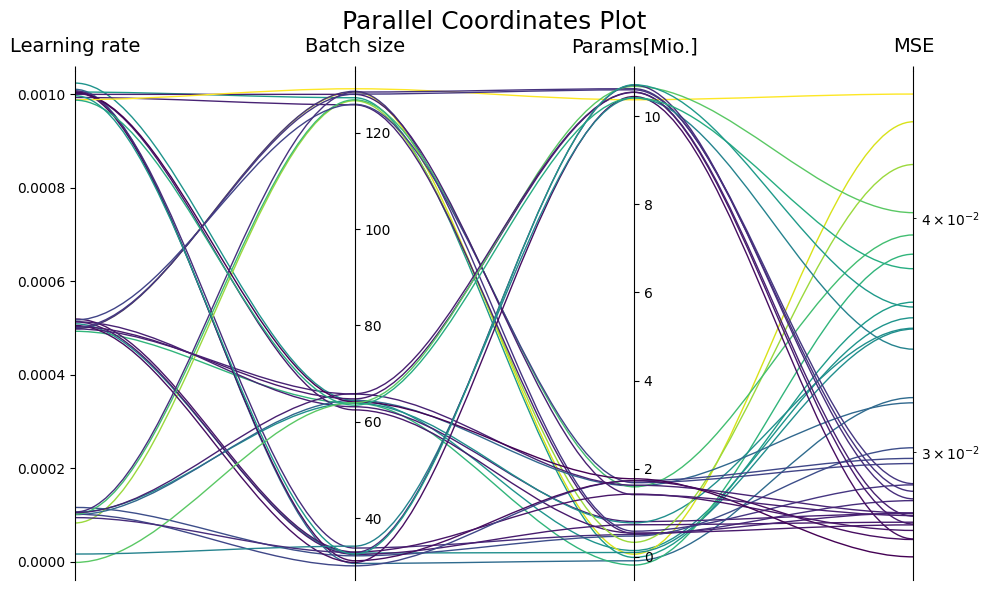

In [17]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np

fig, host = plt.subplots(figsize=(10, 6))

# create some dummy data
#ynames = ['Learning rate', 'MSE', 'Batch size', 'MSE', 'Params[Mio.]', 'MSE']
ynames = ["Learning rate", "Batch size", "Params[Mio.]", "MSE"]
#N1, N2, N3 = 10, 5, 8
#N = N1 + N2 + N3
#y1 = np.random.uniform(0, 10, N) + np.concatenate([np.full(N1, 1), np.full(N2, 2), np.full(N3, 3)]) * 7
#y2 = np.sin(np.random.uniform(0, np.pi, N)) ** np.concatenate([np.full(N1, 1), np.full(N2, 2), np.full(N3, 3)])
#y3 = np.random.binomial(300, 1 - np.concatenate([np.full(N1, 1), np.full(N2, 2), np.full(N3, 3)]) / 10, N)
#y4 = np.random.binomial(200, (np.concatenate([np.full(N1, 1), np.full(N2, 2), np.full(N3, 3)]) / 6) ** 1/3, N)
#y5 = np.random.uniform(0, 800, N)
#ys = np.dstack([y1, y2, y3, y4, y5])[0]
reduced_hpo_table = reduced_hpo_table[reduced_hpo_table["MSE"] < 0.05]
#reduced_hpo_table["MSE2"] = reduced_hpo_table["MSE"]
#reduced_hpo_table["MSE3"] = reduced_hpo_table["MSE"]
#reduced_hpo_table = reduced_hpo_table[["learning_rate", "MSE2", "batch_size", "MSE3", "Params[Mio.]", "MSE" ]]
reduced_hpo_table = reduced_hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE" ]]
ys = reduced_hpo_table.to_numpy()
N = ys.shape[0]

ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  # add 5% padding below and above
ymaxs += dys * 0.05
dys = ymaxs - ymins

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

# Add small horizontal jitter
jitter_strength = 0.00001  # Adjust this value based on your data range
jitter = np.random.normal(0, jitter_strength, zs.shape)
jitter[:, -1] = 0  # Don't jitter the last column

zs += jitter
# Add small horizontal jitter
#jitter_strength = 0.5  # Adjust this value based on your plot's horizontal scale
#horizontal_jitter = np.random.normal(0, jitter_strength, (N, ys.shape[1]))

axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
        #ax.set_yscale('log')


axes[-1].set_yscale('log')

#axes[-2].set_yscale('log')
#axes[-3].set_yscale('log')




host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ynames, fontsize=14)
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
host.set_title('Parallel Coordinates Plot', fontsize=18)

# Use a colormap and normalize based on the last column of ys
color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
cmap = plt.get_cmap('viridis')

for j in range(N):
    color = cmap(color_norm(ys[j, -1]))
    verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
    host.add_patch(patch)

plt.tight_layout()
plt.show()
